                                               Big - Data Fraud Detection Project🚀                                                           

This project was done and facilitated by Group 2 of Our Big Data Analytics course, it aims on using financial data to develop a machine learning model that predicts financial transaction as fraudulent or non-fradulent, The dataset we used in this project contains 500 rows and 7 columns collecting Users Transaction_Amount, Transaction_Time, User_Location, Merchant_Location, User_Age, and Device_Type

                                                Step 1 - Get Used to our Dataset                                                              

In this first step we will try to understand our dataset, exploring the different columns and rows in our dataset, We will also see the distribution of our Numerical and categorical Columns!

In [30]:
# We first load our dataset to understand it
import pandas as pd
df = pd.read_csv('Big_data_fraud_detection_proj.csv')

#Print the top information in our dataset
print(df.head())

   Transaction_Amount  Transaction_Time User_Location Merchant_Location  \
0          380.794718                21        Harare           Nairobi   
1          951.207163                16       Kampala            Luanda   
2          734.674002                 8        Harare            Harare   
3          602.671899                 0        Kigali      Johannesburg   
4          164.458454                20         Tokyo       Addis Ababa   

   User_Age Device_Type  Fraud_Label  
0        41     Desktop            0  
1        53      Mobile            1  
2        27      Tablet            0  
3        15      Tablet            1  
4        27     Desktop            1  


This section contains a logic of detecting fraudulent transactions from non-fradulent transactions!

In [31]:

# These are going to be the original matching cities that we accept
african_cities = ['Kigali', 'Kampala', 'Bujumbura', 'Nairobi', 'Harare', 'Addis Ababa', 'Dar es Salaam', 'Lagos', 'Accra', 'Dakar', 'Luanda', 'Johannesburg']

# We want these cities to be classified as outliers for our dataset
outlier_cities = ['Tokyo', 'Paris', 'London', 'New York']

#define a function that is going to handle fraud logic
def is_fraud(row):
    #Condition one
    if row ['Transaction_Amount'] > 800 and row ["User_Location"] != ['Merchant_Location']:
        return 1
    
    #Condition two
    if row["User_Location"] not in african_cities or row ["Merchant_Location"] not in african_cities:
        return 1
    
    #Condition three
    if row["User_Age"] < 16:
        return 1
    
    # Otherwise Not-Fraud
    return 0

# Apply this fraud logic to fraud label column
df['Fraud_Label'] = df.apply(is_fraud, axis=1)

In [32]:
print("Dataset Shape is: " , df.shape)

# Basic statistics of our dataset
print("\n Dataset Basic Statistics:")
print(df.describe())

Dataset Shape is:  (500, 7)

 Dataset Basic Statistics:
       Transaction_Amount  Transaction_Time    User_Age  Fraud_Label
count          500.000000         500.00000  500.000000   500.000000
mean           503.576095          11.10800   34.656000     0.626000
std            295.701524           7.08157   14.874278     0.484348
min             15.010968           0.00000   10.000000     0.000000
25%            248.866894           5.00000   21.000000     0.000000
50%            518.032111          11.00000   34.500000     1.000000
75%            758.563633          17.00000   47.000000     1.000000
max            993.035148          23.00000   59.000000     1.000000


In [33]:
# We want to check for missing values
print("\n Our Missing Values:")
print(df.isnull().sum())


 Our Missing Values:
Transaction_Amount    0
Transaction_Time      0
User_Location         0
Merchant_Location     0
User_Age              0
Device_Type           0
Fraud_Label           0
dtype: int64



Fraud Label Distribution:


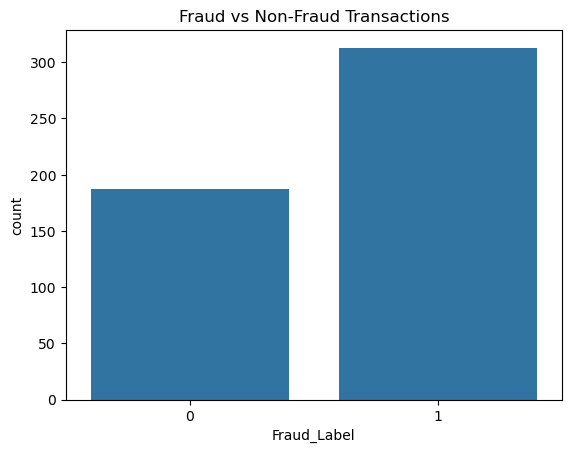

In [34]:
# We want to visualize the ditribution of our fraud_labeled column
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\nFraud Label Distribution:")
sns.countplot(x="Fraud_Label", data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

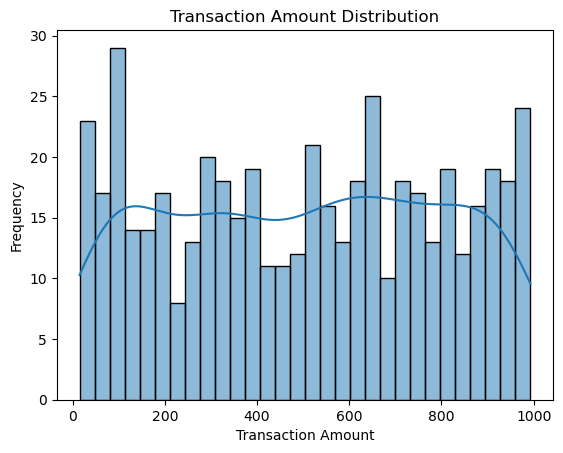

In [35]:
# Let us now try to visualize the distribution of Transaction Amounts

sns.histplot(df["Transaction_Amount"], kde = True, bins = 30)
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")

plt.show()

In [10]:
# After visualizing the numerical data in our dataset, we can now move on to see what is in our categorical variables/columns

# Explore categorical variables: Count unique values 
categorical_columns = ['User_Location', 'Merchant_Location', 'Device_Type']
for col in categorical_columns:
    print(f"\nUnique values in {col}")
    print(df[col].value_counts())


Unique values in User_Location
User_Location
Kigali           41
Lagos            41
Kampala          37
Bujumbura        34
New York         34
Accra            32
Addis Ababa      32
Harare           31
Paris            31
Johannesburg     30
Dakar            29
Tokyo            27
Luanda           27
Dar es Salaam    27
London           25
Nairobi          22
Name: count, dtype: int64

Unique values in Merchant_Location
Merchant_Location
Paris            42
Harare           39
Luanda           36
Kampala          35
Accra            34
Dar es Salaam    33
Dakar            33
London           32
New York         30
Johannesburg     29
Tokyo            29
Nairobi          28
Bujumbura        28
Kigali           28
Addis Ababa      22
Lagos            22
Name: count, dtype: int64

Unique values in Device_Type
Device_Type
Desktop    175
Mobile     171
Tablet     154
Name: count, dtype: int64


                                                    Step 2 - Pre-Processing Our Dataset                                                       

Now Step 1 is done, we now have a clear understanding of our dataset, Ubu tugiye kuri Step 2, Which will be "Pre-Processing Our Data" and preparing it for our Machine Learning Model!

In [36]:
#[Perform One-Hot Encoding on our Categorical Columns]

df_encoded = pd.get_dummies(df, columns= ['User_Location', 'Merchant_Location', 'Device_Type'], drop_first=True)

# Display the first few rows of our encoded data
print("Endoded Dataset Preview: ")
print(df_encoded.head())

Endoded Dataset Preview: 
   Transaction_Amount  Transaction_Time  User_Age  Fraud_Label  \
0          380.794718                21        41            0   
1          951.207163                16        53            1   
2          734.674002                 8        27            0   
3          602.671899                 0        15            1   
4          164.458454                20        27            1   

   User_Location_Addis Ababa  User_Location_Bujumbura  User_Location_Dakar  \
0                      False                    False                False   
1                      False                    False                False   
2                      False                    False                False   
3                      False                    False                False   
4                      False                    False                False   

   User_Location_Dar es Salaam  User_Location_Harare  \
0                        False                  True

In [37]:
# After encoding our categorical variables, we are now going to normalize our numerical columns to aid our model's learning process, We are going 
# to normalize only the Transaction_amount column

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler to scale our values under the Transaction_Amount column in a range of 0 to 1
scaler = MinMaxScaler()

# Normalize the 'Transaction_amount' column]
df_encoded['Transaction_Amount'] = scaler.fit_transform(df_encoded[['Transaction_Amount']])

# Display a few rows to see the normalization change
print("\n Normalized Dataset on Transaction amount column")
print(df_encoded.head())


 Normalized Dataset on Transaction amount column
   Transaction_Amount  Transaction_Time  User_Age  Fraud_Label  \
0            0.374003                21        41            0   
1            0.957232                16        53            1   
2            0.735834                 8        27            0   
3            0.600865                 0        15            1   
4            0.152806                20        27            1   

   User_Location_Addis Ababa  User_Location_Bujumbura  User_Location_Dakar  \
0                      False                    False                False   
1                      False                    False                False   
2                      False                    False                False   
3                      False                    False                False   
4                      False                    False                False   

   User_Location_Dar es Salaam  User_Location_Harare  \
0                        Fal

In [39]:
# Now that we've encoded our categorical variables and normalized the numerical data, we now need to split our dataset into training and testing categories.
# This is important because we want to train our model on a portion of the data and then test it's performamce on a separate unseen portion

# We'll use 80% to train and 20% to test (Evaluate the performance of our model)

from sklearn.model_selection import train_test_split

# Separate our dataset into features (X as the independent variable) and (y as the dependent variable)
X = df_encoded.drop(columns=['Fraud_Label'])
y = df_encoded["Fraud_Label"]

# Split our dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Display the shape of the training and testing sets
print("\n Training Set Size: ", X_train.shape)
print("\n Test Set Size: ", X_test.shape)


 Training Set Size:  (400, 35)

 Test Set Size:  (100, 35)


So, we've now prepared our dataset for machine learning, we applied one-hot encoding to turn our categorical values into numerical values, and we also performed normalization on a scale of 0 to 1 for transaction_amount

We also splitted our dataset into training and testing sets, where 80% is for training and 20% is for testing

                                            Step 3: Build and Train Our Model                                                                 

So, in this step, we will:
1. Choose a machine learning algorithm
2. Train the model using the training dataset
3. Evaluate our model's performance using the test dataset

In [40]:
# Let us with Logistic regression to train our model

from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on our training splits
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Now, we've trained the model, so we can now evaluate how well the model perfoms on the dataset. We'll use:
 1. Accuracy: The percentage of correctly classified examples
 2. Confusion_Matrix: This will help us to understand how many fraud and non-frauds were correctly or incorrectly classified!
 3. Classification Report: This will show us the precision, recall, and F1-score of our model so far!

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict the labels for the test set
y_pred = model.predict(X_test)

# We can now see the accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:  {accuracy: .2f}")

#  Generate the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report: ")
print(class_report)


Accuracy:   0.89

Confusion Matrix:
[[36  9]
 [ 2 53]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        45
           1       0.85      0.96      0.91        55

    accuracy                           0.89       100
   macro avg       0.90      0.88      0.89       100
weighted avg       0.90      0.89      0.89       100



Some insights on this: The model perfoms better at predicting fraud than non-fraud!
Now we can focus on reducing False Positives (Cases where non-fraud transactions were wrongly classified as fraud), We'll improve this by using a different algorithm like Random Forest and perform Hyperparameter - Tuning on our model!

In [42]:
# Let us use a different algorithm like Random Forest to refine our model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Training our Random Forest Model
rf_model.fit(X_train,y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of our Random Forest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Confusion Matrix: ")
print(conf_matrix_rf)

# Classification report
class_report_rf = classification_report(y_test, y_pred)
print("\nRandom Forest Classification Report: ")
print(class_report_rf)


# ROC_AUC Score
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"Random Forest ROC-AUC Score: {roc_auc_rf: .2f}")



Random Forest Confusion Matrix: 
[[45  0]
 [ 0 55]]

Random Forest Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        45
           1       0.85      0.96      0.91        55

    accuracy                           0.89       100
   macro avg       0.90      0.88      0.89       100
weighted avg       0.90      0.89      0.89       100

Random Forest ROC-AUC Score:  1.00


                                                Step 4: Saving Our ML Model                                                                   

In [43]:
import joblib 

# Save our model to a file
joblib.dump(rf_model, 'Big_data_fraud_detection_model.pkl')

['Big_data_fraud_detection_model.pkl']